In [1]:
BEIJING, CHANGCHUN, ULUMUQI, SICHUAN, GUANGZHOU, SHENZHEN, SHANGHAI, NEWYORK, WUHAN, BANGKOK = """
BEIJING CHANGCHUN ULUMUQI SICHUAN GUANGZHOU SHENZHEN SHANGHAI NEWYORK WUHAN BANGKOK
""".split()

In [2]:
dictionary = {}

In [7]:
connection = {
    CHANGCHUN: [BEIJING],
    ULUMUQI: [BEIJING], 
    BEIJING: [ULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [8]:
import networkx as nx

In [9]:
%matplotlib inline

In [10]:
graph = connection

In [11]:
g = nx.Graph(graph)

C:\Users\Xraigor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


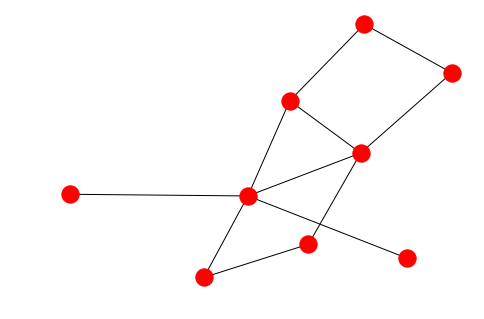

In [12]:
nx.draw(g)

In [13]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

In [14]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

In [15]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

C:\Users\Xraigor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


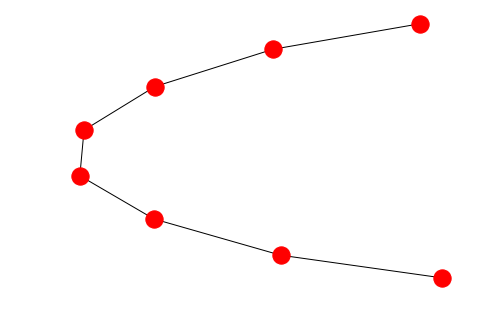

In [16]:
nx.draw(nx.Graph(connection_2))

In [18]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [19]:
def draw_route(routes):
    print("= ->".join(routes))

In [20]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN= ->BEIJING= ->SHENZHEN= ->BANGKOK


In [21]:
nagivator(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [24]:
## Sentence GENERATION
grammer = """
stmt = if block else block
block = cmp; assignment
assignment = XXX
XXX
"""

In [49]:
decimal_grammer = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 num num
op = + | - | / 
"""

In [50]:
grammer = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""


In [51]:
import random

In [52]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [53]:
g = parse_grammer(grammer)

In [54]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [55]:
def gene(grammer_parsed, target = "sentence"):
    if target not in grammer_parsed: return target
    rules = random.choice(grammer_parsed[target])
    
    return "".join(gene(grammer_parsed, target = r) for r in rules if r != "null")

In [56]:
generate("verb_phrase") = generate("verb") + generate("noun_phrase")
generate('noun') = random.choice("女人 |  篮球 | 桌子 | 小猫")

SyntaxError: can't assign to function call (<ipython-input-56-767d77824cd0>, line 1)

In [57]:
print(gene(parse_grammer(decimal_grammer,sep = "="), target = "expression"))

5-1-4-3


In [59]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammer, sep='='), target='expression'))

3/8/7-7
5/6/0+972
928+4+2-8
5/6+0-1
8+0+6/6
8/985/8-0
962+3-99681/4
5+7-1+3
0/6+7/4
3+1-8/7
6-8-7/911
1-1/918-1
3+8-5+921
3+7+4-1
2/953/3/3
7+980/3+4
2/3+4-5
3-7-6-7
6-8+3+2
7+8/7/5
